# Покемоны и AB-тестирование 


# Описание задачи

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats 
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns

In [2]:
pokemon = pd.read_csv('03_pokemon.csv', error_bad_lines=False)
pokemon.head()

# у покемона может быть один или два класса
# если у покемона два класса, считается, что они имеют одинаковую значимость

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


# Задачи

<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [3]:
# формирование нужных выборок
pok_rock = pokemon.loc[((pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'] != 'Grass')) | (pokemon['Class 2'] == 'Rock') & (pokemon['Class 1'] != 'Grass')]
pok_grass = pokemon.loc[((pokemon['Class 1'] == 'Grass') & (pokemon['Class 2'] != 'Rock')) | (pokemon['Class 2'] == 'Grass') & (pokemon['Class 1'] != 'Rock')]

In [4]:
# дисперсионный анализ
F, p = stats.f_oneway(pok_rock['Attack'], pok_grass['Attack'])
alpha = 0.05
print(F, p)

13.908853861099336 0.00027333381459902556


In [5]:
if p > alpha:
    print('Оснований отвергнуть H0 недостаточно (вероятно, распределение одинаково)')
else:
    print('Отклоняем H0 (вероятно, распределение разное)')

Отклоняем H0 (вероятно, распределение разное)


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


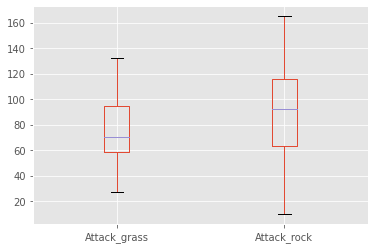

In [6]:
# построим boxplot для подтверждения/уточнения сделанного вывода
pok_rock_mod = pok_rock['Attack'].reset_index().drop('index', axis=1)
pok_grass_mod = pok_grass['Attack'].reset_index().drop('index', axis=1)
pok_grass_mod['Attack_rock'] = pok_rock_mod['Attack']
pok_grass_mod.rename(columns={'Attack': 'Attack_grass'}, inplace=True)
pok_grass_mod.boxplot()

In [8]:
# из дисперсионного анализа и boxplot следует, что более сильную атаку имеет, наоборот, тип покемонов "Rock"

<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [9]:
pok_water = pokemon.loc[((pokemon['Class 1'] == 'Water') & (pokemon['Class 2'] != 'Normal')) | (pokemon['Class 2'] == 'Water') & (pokemon['Class 1'] != 'Normal')]
pok_normal = pokemon.loc[((pokemon['Class 1'] == 'Normal') & (pokemon['Class 2'] != 'Water')) | (pokemon['Class 2'] == 'Normal') & (pokemon['Class 1'] != 'Water')]

In [10]:
F, p = stats.f_oneway(pok_water['Speed'], pok_normal['Speed'])
alpha = 0.05
print(F, p)

4.6264281532023315 0.03255353551390953


In [11]:
if p > alpha:
    print('Оснований отвергнуть H0 недостаточно (вероятно, распределение одинаково)')
else:
    print('Отклоняем H0 (вероятно, распределение разное)')

Отклоняем H0 (вероятно, распределение разное)


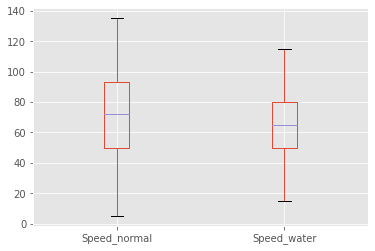

In [12]:
pok_water_mod = pok_water['Speed'].reset_index().drop('index', axis=1)
pok_normal_mod = pok_normal['Speed'].reset_index().drop('index', axis=1)
pok_normal_mod['Speed_water'] = pok_water_mod['Speed']
pok_normal_mod.rename(columns={'Speed': 'Speed_normal'}, inplace=True)
pok_normal_mod.boxplot()

In [13]:
# из дисперсионного анализа и boxplot следует, что более высокую скорость имеют, наоборот, тип покемонов "Normal"

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [14]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']

In [15]:
clean_pok = pokemon.loc[~pokemon['Name'].isin(treathed_pokemon)]
speeded_pok = pokemon.loc[pokemon['Name'].isin(treathed_pokemon)]  # очень маленькая выбора - 4 наблюдения!

In [16]:
F, p = stats.f_oneway(clean_pok['Speed'], speeded_pok['Speed'])
print(F, p)

29.002612875632842 9.51510117630603e-08


In [17]:
if p > alpha:
    print('Оснований отвергнуть H0 недостаточно (вероятно, распределение одинаково)')
else:
    print('Отклоняем H0 (вероятно, распределение разное)')

Отклоняем H0 (вероятно, распределение разное)


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


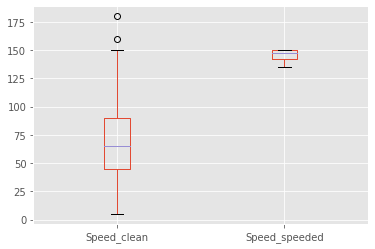

In [18]:
clean_pok_mod = clean_pok['Speed'].reset_index().drop('index', axis=1)
speeded_pok_mod = speeded_pok['Speed'].reset_index().drop('index', axis=1)
clean_pok_mod['Speed_speeded'] = speeded_pok_mod['Speed']
clean_pok_mod.rename(columns={'Speed': 'Speed_clean'}, inplace=True)
clean_pok_mod.boxplot()

In [19]:
# принимаем гипотезу о значительной эффективности сыворотки

<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [20]:
# добавление в датафрейм столбца по условию задачи
pokemon['sum_points'] = pokemon['HP'] + pokemon['Attack'] + pokemon['Defense']
pokemon['mult_points'] = pokemon['HP'] * pokemon['Attack'] * pokemon['Defense']
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,sum_points,mult_points
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143,108045
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185,234360
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245,544480
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,303,984000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,134,87204


In [21]:
pokemon.groupby('Legendary').mean()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,sum_points,mult_points
Legendary,,,,,,,,,
False,389.900680,67.182313,75.669388,71.559184,68.454422,68.892517,65.455782,214.410884,4.250414e+05
True,520.353846,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615,309.076923,1.085942e+06


In [22]:
# визуально - различия в целевых колонках очень значительные

In [23]:
# оценка по сумме характеристик (sum_points)
F, p = stats.f_oneway(pokemon['sum_points'].loc[pokemon['Legendary'] == True], pokemon['sum_points'].loc[pokemon['Legendary'] == False])
print(F, p)

134.37104128585798 7.970942205720804e-29


In [24]:
alpha = 0.05
if p > alpha:
    print('Оснований отвергнуть H0 недостаточно (вероятно, распределение одинаково)')
else:
    print('Отклоняем H0 (вероятно, распределение разное)')

Отклоняем H0 (вероятно, распределение разное)


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


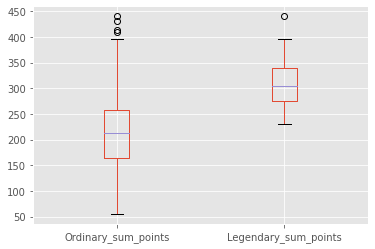

In [25]:
leg_pok = pokemon.loc[pokemon['Legendary'] == True]['sum_points'].reset_index().drop('index', axis=1)
ord_pok = pokemon.loc[pokemon['Legendary'] == False]['sum_points'].reset_index().drop('index', axis=1)
ord_pok['Legendary_sum_points'] = leg_pok['sum_points']
ord_pok.rename(columns={'sum_points': 'Ordinary_sum_points'}, inplace=True)
ord_pok.boxplot()

In [26]:
# Вывод: по сумме характеристик Легендарные покемоны значительно опережают обычных

In [27]:
# оценка по произведению характеристик (mult_points)
F, p = stats.f_oneway(pokemon['mult_points'].loc[pokemon['Legendary'] == True], pokemon['mult_points'].loc[pokemon['Legendary'] == False])
print(F, p)

175.9138909709736 1.9926643088419018e-36


In [28]:
alpha = 0.05
if p > alpha:
    print('Оснований отвергнуть H0 недостаточно (вероятно, распределение одинаково)')
else:
    print('Отклоняем H0 (вероятно, распределение разное)')

Отклоняем H0 (вероятно, распределение разное)


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


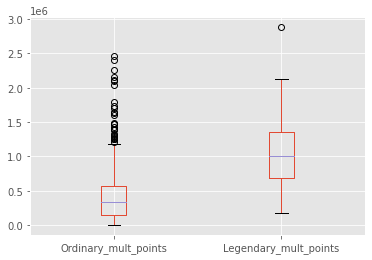

In [29]:
leg_pok = pokemon.loc[pokemon['Legendary'] == True]['mult_points'].reset_index().drop('index', axis=1)
ord_pok = pokemon.loc[pokemon['Legendary'] == False]['mult_points'].reset_index().drop('index', axis=1)
ord_pok['Legendary_mult_points'] = leg_pok['mult_points']
ord_pok.rename(columns={'mult_points': 'Ordinary_mult_points'}, inplace=True)
ord_pok.boxplot()

In [30]:
# Вывод: по произведению характеристик Легендарные покемоны также значительно опережают обычных

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [31]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [32]:
# создание нужных выборок
pok_rock = pokemon.loc[(pokemon['Class 1'] == 'Rock') | (pokemon['Class 2'] == 'Rock')]
pok_ground = pokemon.loc[(pokemon['Class 1'] == 'Ground') | (pokemon['Class 2'] == 'Ground')]
pok_steel = pokemon.loc[(pokemon['Class 1'] == 'Steel') | (pokemon['Class 2'] == 'Steel')]
pok_ice = pokemon.loc[(pokemon['Class 1'] == 'Ice') | (pokemon['Class 2'] == 'Ice')]

In [33]:
F, p = stats.f_oneway(pok_rock['Defense'], pok_ground['Defense'], pok_steel['Defense'], pok_ice['Defense'])
print(F, p)

10.82012408304731 1.231528168152447e-06


In [34]:
alpha = 0.05

if p > alpha:
    print('Оснований отвергнуть H0 недостаточно (вероятно, распределение одинаково)')
else:
    print('Отклоняем H0 (вероятно, распределение разное)')

Отклоняем H0 (вероятно, распределение разное)


<ipython-input-35-cfec8a239a77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pok_rock['ground_def'] = pok_ground['Defense']
<ipython-input-35-cfec8a239a77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pok_rock['steel_def'] = pok_steel['Defense']
<ipython-input-35-cfec8a239a77>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

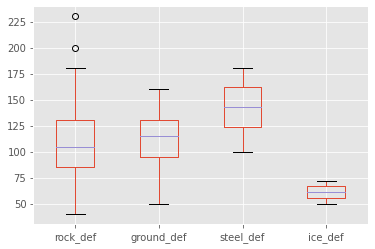

In [35]:
pok_rock['ground_def'] = pok_ground['Defense']
pok_rock['steel_def'] = pok_steel['Defense']
pok_rock['ice_def'] = pok_ice['Defense']
pok_rock.rename(columns={'Defense': 'rock_def'}, inplace=True)
pok_rock = pok_rock[['rock_def', 'ground_def', 'steel_def', 'ice_def']]
pok_rock.boxplot()

In [36]:
# Вывод: защита класса ice наихудшая, класса steel - наилучшая, классов rock и ground - в целом одинакова.